# BOW: Bag Of Words Model

- used for feature extraction from natural language data/ document __"bag of words"__ algorithm is used

- __TF-IDF(feature extraction):__ Term frequency & inverse document frequency

term Freq= freq. of term 't' in docu.'d'
         _________________________________
            total terms in doc 'd'

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

__TFIDF__

In [1]:
import pandas as pd
import numpy as np

In [2]:
corpus = ['inflation increased unemployment', 
         'company increased sales', 
         'fear increased pulse']

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [5]:
tr_idf_model  = TfidfVectorizer()
tf_idf_vector = tr_idf_model.fit_transform(corpus)

In [6]:
print(type(tf_idf_vector), tf_idf_vector.shape) 
#3 row 7 col

<class 'scipy.sparse.csr.csr_matrix'> (3, 7)


In [7]:
print(tf_idf_vector)

  (0, 6)	0.652490884512534
  (0, 2)	0.3853716274664007
  (0, 3)	0.652490884512534
  (1, 5)	0.652490884512534
  (1, 0)	0.652490884512534
  (1, 2)	0.3853716274664007
  (2, 4)	0.652490884512534
  (2, 1)	0.652490884512534
  (2, 2)	0.3853716274664007


In [8]:
tf_idf_array = tf_idf_vector.toarray()

print(tf_idf_array)


[[0.         0.         0.38537163 0.65249088 0.         0.
  0.65249088]
 [0.65249088 0.         0.38537163 0.         0.         0.65249088
  0.        ]
 [0.         0.65249088 0.38537163 0.         0.65249088 0.
  0.        ]]


In [11]:
words_set = tr_idf_model.get_feature_names_out()

print(words_set)


AttributeError: 'TfidfVectorizer' object has no attribute 'get_feature_names_out'

In [12]:
df_tf_idf = pd.DataFrame(tf_idf_array, columns = words_set)

df_tf_idf

NameError: name 'words_set' is not defined

# Bag Of Words

In [1]:
#create a list of stopwords.You can import stopwords from nltk too
stopwords=["to","is","a"]
#list of special characters.You can use regular expressions too
special_char=[",",":"," ",";",".","?"]
#Write the sentences in the corpus,in our case, just two 
string1="Welcome to Great Learning , Now start learning"
string2="Learning is a good practice"
#convert them to lower case
string1=string1.lower()
string2=string2.lower()

In [2]:
print(string1)
print(string2)

welcome to great learning , now start learning
learning is a good practice


In [3]:
#split the sentences into tokens
tokens1=string1.split()
tokens2=string2.split()
print(tokens1)
print(tokens2)

['welcome', 'to', 'great', 'learning', ',', 'now', 'start', 'learning']
['learning', 'is', 'a', 'good', 'practice']


In [4]:
def unique(sequence):
    # Initialize an empty set to keep track of seen elements
    seen = set()

    # Create a new list to store unique elements while preserving order
    unique_elements = []

    # Iterate through each element in the input sequence
    for x in sequence:
        # Check if the element is not already in the 'seen' set
        # or add it to the 'seen' set if it's the first occurrence
        if x not in seen:
            seen.add(x)  # Add the element to the 'seen' set
            unique_elements.append(x)  # Add the element to the new list

    # Return the list containing unique elements while maintaining order
    return unique_elements

In [5]:
#create a vocabulary list
vocab=unique(tokens1+tokens2)
print(vocab)

['welcome', 'to', 'great', 'learning', ',', 'now', 'start', 'is', 'a', 'good', 'practice']


In [6]:
#filter the vocabulary list
filtered_vocab=[]
for w in vocab: 
    if w not in stopwords and w not in special_char: 
        filtered_vocab.append(w)
print(filtered_vocab)

['welcome', 'great', 'learning', 'now', 'start', 'good', 'practice']


In [7]:
def vectorize(tokens):
    '''Doc_string:  This function takes list of words in a sentence as input 
    and returns a vector of size of filtered_vocab.It puts 0 if the 
    word is not present in tokens and count of token if present.'''
    vector=[]
    for w in filtered_vocab:
        vector.append(tokens.count(w))
    return vector

In [8]:
print(vectorize.__doc__)

 This function takes list of words in a sentence as input 
    and returns a vector of size of filtered_vocab.It puts 0 if the 
    word is not present in tokens and count of token if present.


In [9]:
# convert sentences into vectords
# encoding
vector1=vectorize(tokens1)
print(vector1)
vector2=vectorize(tokens2)
print(vector2)

[1, 1, 2, 1, 1, 0, 0]
[0, 0, 1, 0, 0, 1, 1]


In [10]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

C:\Users\Mayur\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


__n-gram__
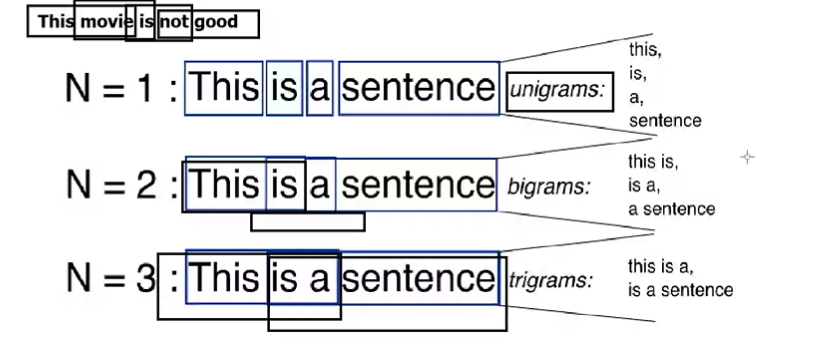

In [11]:
sentence_1="This is a good job.I will not miss it for anything"
sentence_2="This is not good at all"

__Stop words API:__ https://aclanthology.org/W18-2502.pdf

In [12]:
CountVec = CountVectorizer(ngram_range=(1,1), # to use bigrams ngram_range=(2,2)
                           stop_words='english')

In [13]:
#transform & fit-transform

In [14]:
#transform
Count_data = CountVec.fit_transform([sentence_1,sentence_2])

In [15]:
Count_data

<2x3 sparse matrix of type '<class 'numpy.int64'>'
	with 4 stored elements in Compressed Sparse Row format>

In [16]:
CountVec.get_feature_names_out()

AttributeError: 'CountVectorizer' object has no attribute 'get_feature_names_out'

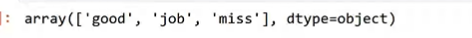

In [17]:
Count_data.toarray()

array([[1, 1, 1],
       [1, 0, 0]], dtype=int64)

In [18]:
#create dataframe
cv_dataframe=pd.DataFrame(Count_data.toarray(),columns=CountVec.get_feature_names_out())
print(cv_dataframe)


AttributeError: 'CountVectorizer' object has no attribute 'get_feature_names_out'

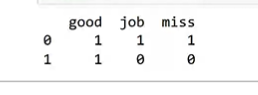

__Word Sence dis-ambiguity__: meaning of word changes with sentence is known as WSDA(removing the complexity)

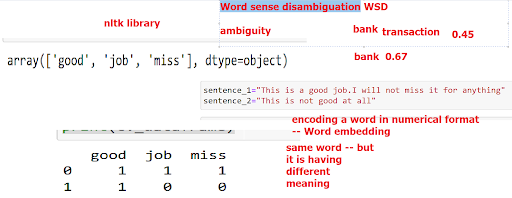

In [19]:
#NLTK....Tensorflow